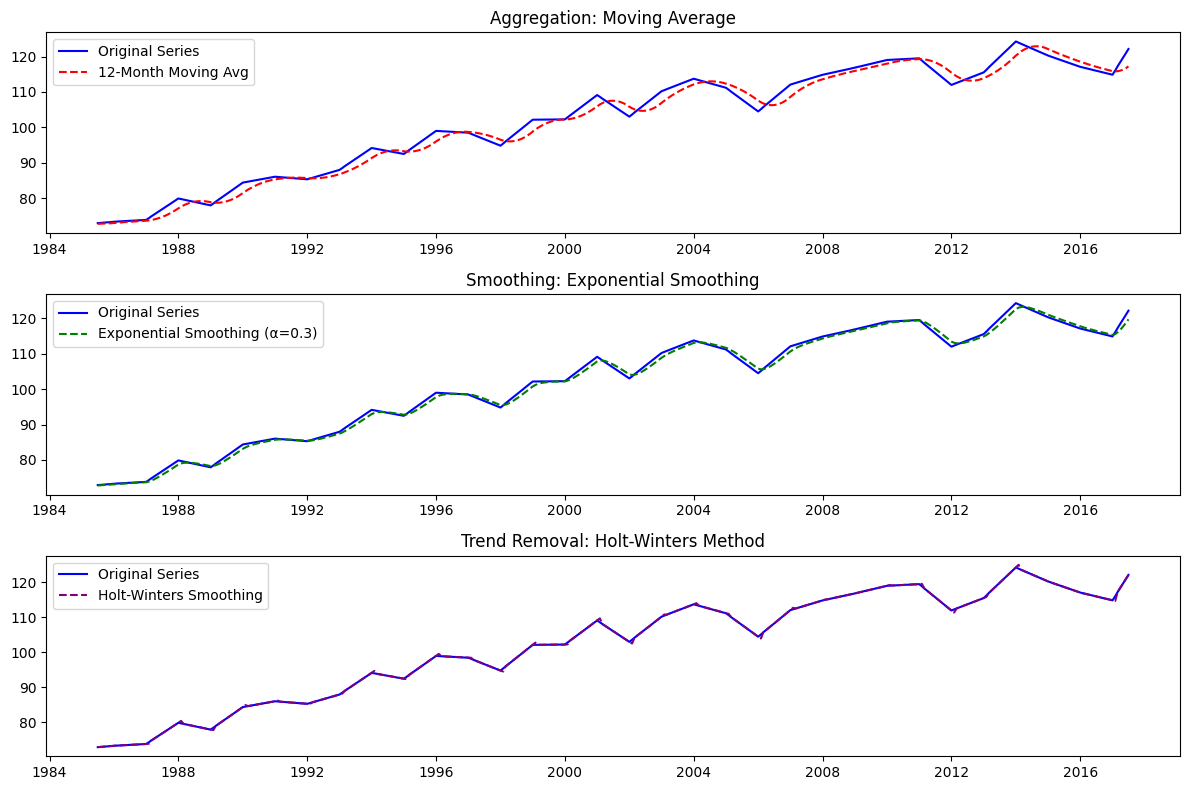

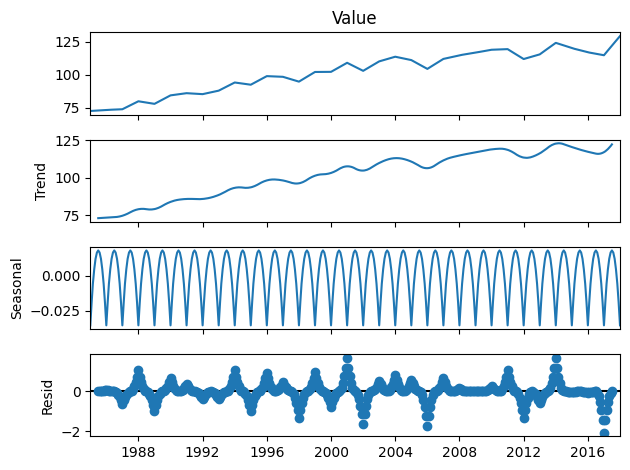

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Load the dataset
file_path = "Electric_Production.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Convert DATE column to datetime format and set as index
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)  # Ensure correct date format
df.set_index('DATE', inplace=True)

# Ensure time series has a fixed frequency (Month Start)
df = df.asfreq('MS')

# Step 2: Handle Missing Values (Fix for seasonal_decompose error)
df['Value'] = df['Value'].interpolate(method='linear')  # Fill missing values

# Step 3: Aggregation - Apply Moving Average Smoothing
df['Moving_Avg_12'] = df['Value'].rolling(window=12, min_periods=1).mean()  # 12-month moving average

# Step 4: Smoothing - Apply Exponential Smoothing
df['Exp_Smooth_Alpha0.3'] = df['Value'].ewm(alpha=0.3).mean()

# Step 5: Seasonal Decomposition (Trend, Seasonality, Residuals)
decomposed = seasonal_decompose(df['Value'], model='additive', period=12)

# Extract Trend, Seasonal, and Residual components
df['Trend'] = decomposed.trend
df['Seasonal'] = decomposed.seasonal
df['Residual'] = decomposed.resid

# Drop NaN values after decomposition for better plotting
df.dropna(inplace=True)

# Step 6: Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
df['HoltWinters'] = hw_fit.fittedvalues

# Step 7: Plot Original vs Aggregation & Smoothing
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Value'], label="Original Series", color='blue')
plt.plot(df['Moving_Avg_12'], label="12-Month Moving Avg", color='red', linestyle='dashed')
plt.title("Aggregation: Moving Average")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Value'], label="Original Series", color='blue')
plt.plot(df['Exp_Smooth_Alpha0.3'], label="Exponential Smoothing (α=0.3)", color='green', linestyle='dashed')
plt.title("Smoothing: Exponential Smoothing")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Value'], label="Original Series", color='blue')
plt.plot(df['HoltWinters'], label="Holt-Winters Smoothing", color='purple', linestyle='dashed')
plt.title("Trend Removal: Holt-Winters Method")
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Display Seasonal Decomposition Components
decomposed.plot()
plt.show()

